# Exercise 4

In the lecture you had the following relationship, with $k = 2m + 1$:
\begin{gather*}
\begin{pmatrix}
	u_h(x_{n-m}) \\
	u_h(x_{n-m +1}) \\	
	\vdots \\
	u_h(x_{n+m-1}) \\	
	u_h(x_{n+m})
\end{pmatrix}
= \mathrm{S}_{k}
\begin{pmatrix}
	u^{(0)}(x_n)\\
	u^{(1)}(x_n)\\
	u^{(2)}(x_n)\\
	\vdots \\
	u^{(2m)}(x_n)
\end{pmatrix}
\end{gather*}
After inverting $\mathrm{S}_k$ the difference quotient of optimal order can be obtained by the correspondig row of $\mathrm{S}_k^{-1}$.
## Exercise 4 a)

Complete the following code-block:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import factorial
from scipy.sparse import diags 

m=10
x=[i for i in range(2*m+1)]

def get_S(x,x0):
    d = len(x) #dimension of matrix S
    S = np.zeros((d,d)) #Initialize matrix S into d*d 0 matrix
    #Construct matrix S
    for i in range(d):
        for j in range(d):
            S[i][j] = ( (x[i] - x0)**(j) ) / factorial(j) # ith row and jth coloumn element of matrix S        
    return S
        
def diff_qoutient( x , p = 2 , k = 1):
    N = len(x) 
    D = np.zeros(( N-2*k, N )) #Initialize matrix D into (N-2m)*N 0 matrix
    
    # you may use a loop here 
    for i in range(N-2*k):
        InvS = np.linalg.inv(get_S( x,x[i+k] )) #using np.linalg.inv to obtaion the inverse of S
        D[i] = InvS[p]  #The ith row of D is the pth row of S-1
    
    return D

## Exercise 4 b)

Apply $D$ for $p=2$ on $f(x) = \frac{1}{ 1 + x^2 }$ after discretizing by using the following grids:

- The equidistant grid $x_i = \frac{2 i}{ n - 1} - 1 $ for $k=0, \dots, n-1$ and $n = 10$.
- Chebycheff-nodes
\begin{gather*}
		x_k := \cos\left(\frac{2k + 1 }{ 2n } \pi \right), \qquad k = 0, \dots, n-1\
\end{gather*}
also for $n=10$

Plot everything in one figure.


Text(0.5, 1.0, 'Plot of the second derivative of f(x) and its approximations')

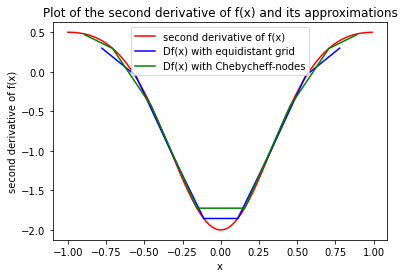

In [2]:
def f(x):
    return 1 / ( 1 + x ** 2)

def ddf(x):
    # second derivitive of f
    return ( 6*x**2-2 ) / (1+x**2)**3


n = 10

x1 = [ ( (2*i)/(n-1) - 1 ) for i in range(n)]  #equidistant grid x1  xi = 2i/(n-1)-1 for i=0,1,2...n-1
x2 = [ np.cos( np.pi * ((2*i+1)/2/n) ) for i in range(n)] #Chebycheff-nodes xi = cos(pi(2k+1)/2n) for i=0,1,2,...n-1

plt.plot(np.arange(-1,1,0.01),[ddf(i) for i in np.arange(-1,1,0.01)],c='r',label='second derivative of f(x)')  #plot the second derivative of f(x)  -1 < x < 1 
plt.plot(x1[1:-1],np.dot(diff_qoutient( x1, p = 2 , k = 1),[ f(j) for j in x1]),c='b',label='Df(x) with equidistant grid') #plot the approximation obtained applying D on equidistant grids
plt.plot(x2[1:-1],np.dot(diff_qoutient( x2, p = 2 , k = 1),[ f(j) for j in x2]),c='g',label='Df(x) with Chebycheff-nodes') #plot the approximation obtained applying D Chebycheff-nodes
plt.legend()
plt.xlabel('x')
plt.ylabel('second derivative of f(x)')
plt.title('Plot of the second derivative of f(x) and its approximations')